# 🍷 Wine Quality Prediction using Logistic Regression
## Goal: Predict wine quality (score 0–10) based on physicochemical features.


"""
Wine Quality Dataset used in this project is based on:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis (2009).
"Modeling wine preferences by data mining from physicochemical properties".
Decision Support Systems, 47(4):547-553.
https://doi.org/10.1016/j.dss.2009.05.016

Data obtained from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/wine+quality
"""


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

print("Importations complete.")

Importations complete.


## Data Preprocessing
* Checking for missing values
* Visualizing the data distribution
* Descriptive statistics

In [2]:
df_wqw = pd.read_csv('winequality-white.csv', sep=';')
df_wqw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
#df_wqr = pd.read_csv('winequality-red.csv', sep=';')
#df_wqr.info()

In [3]:
df_wqw.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
152,6.9,0.25,0.30,4.1,0.054,23.0,116.0,0.99400,2.99,0.38,9.4,6
3782,7.6,0.27,0.30,9.2,0.018,23.0,96.0,0.99380,3.08,0.29,11.0,6
3276,6.6,0.23,0.30,4.6,0.060,29.0,154.0,0.99142,3.23,0.49,12.2,8
632,6.9,0.24,0.33,4.8,0.040,16.0,131.0,0.99360,3.26,0.64,10.7,6
3361,6.4,0.17,0.27,9.9,0.047,26.0,101.0,0.99596,3.34,0.50,9.9,6
2765,6.4,0.27,0.29,10.8,0.028,17.0,118.0,0.99356,3.18,0.37,11.2,6
2316,7.4,0.20,0.31,1.6,0.038,34.0,116.0,0.99120,3.25,0.39,12.0,7
4005,6.8,0.14,0.35,1.5,0.047,40.0,117.0,0.99111,3.07,0.72,11.1,6
3280,6.4,0.15,0.29,1.8,0.044,21.0,115.0,0.99166,3.10,0.38,10.2,5
3932,6.9,0.22,0.28,7.8,0.050,43.0,116.0,0.99326,3.22,0.60,11.5,8


In [4]:
df_wqw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Exploratory Data Analysis (EDA)
* Visualizing the distribution of wine quality scores
* Visualizing the correlation matrix
* Visualizing Pairplots / Boxplots / Histograms of physicochemical features against wine quality

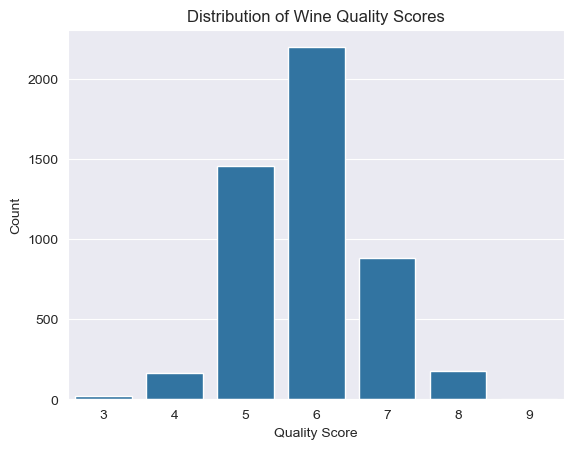

In [5]:
sns.countplot(x='quality', data=df_wqw)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

#### Here we can observe that there are almost none of wines with a Quality score of 9 and barely some with the Score of 3

<Axes: >

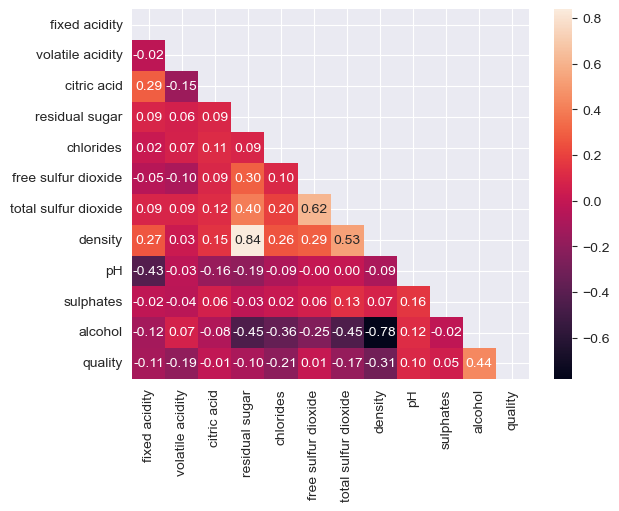

In [6]:
sns.heatmap(df_wqw.corr(), annot=True, fmt='.2f', mask=np.triu(df_wqw.corr()))

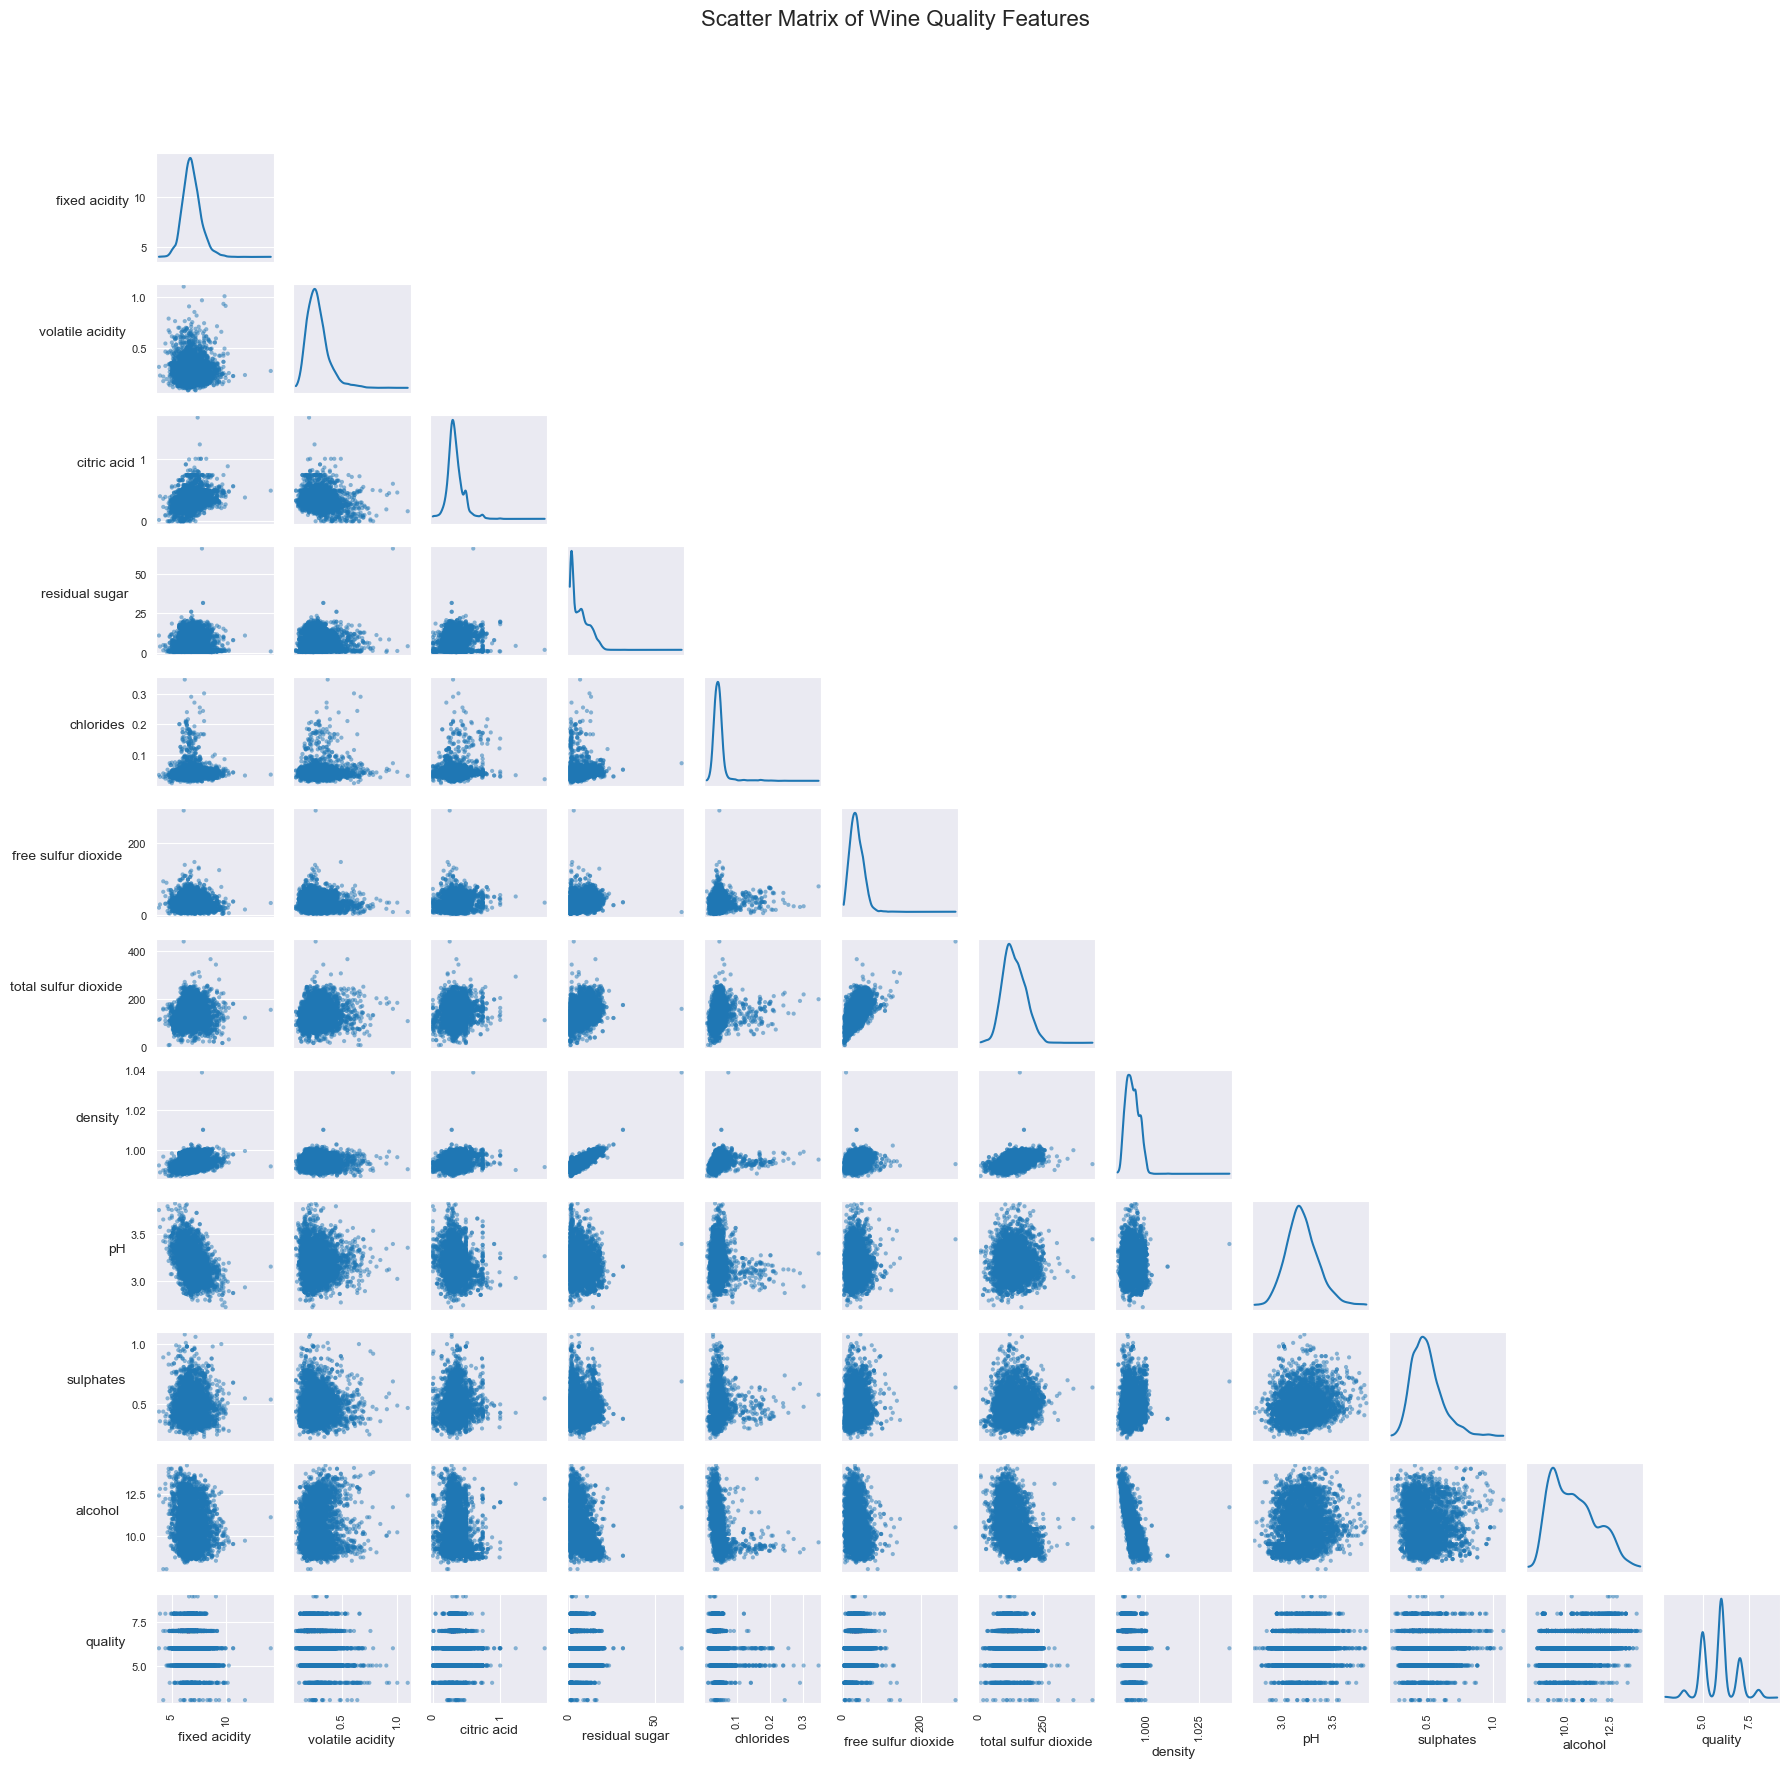

In [7]:
axes = pd.plotting.scatter_matrix(df_wqw, figsize=(18, 18), diagonal='kde', alpha=0.5)
plt.suptitle('Scatter Matrix of Wine Quality Features', fontsize=16)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(0)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.yaxis.label.set_position((0,0.5))
plt.tight_layout()
plt.subplots_adjust(top=0.9) # Adjust the top to make room for the title
for i in range (np.shape(axes)[0]):
    for j in range (np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
plt.show()

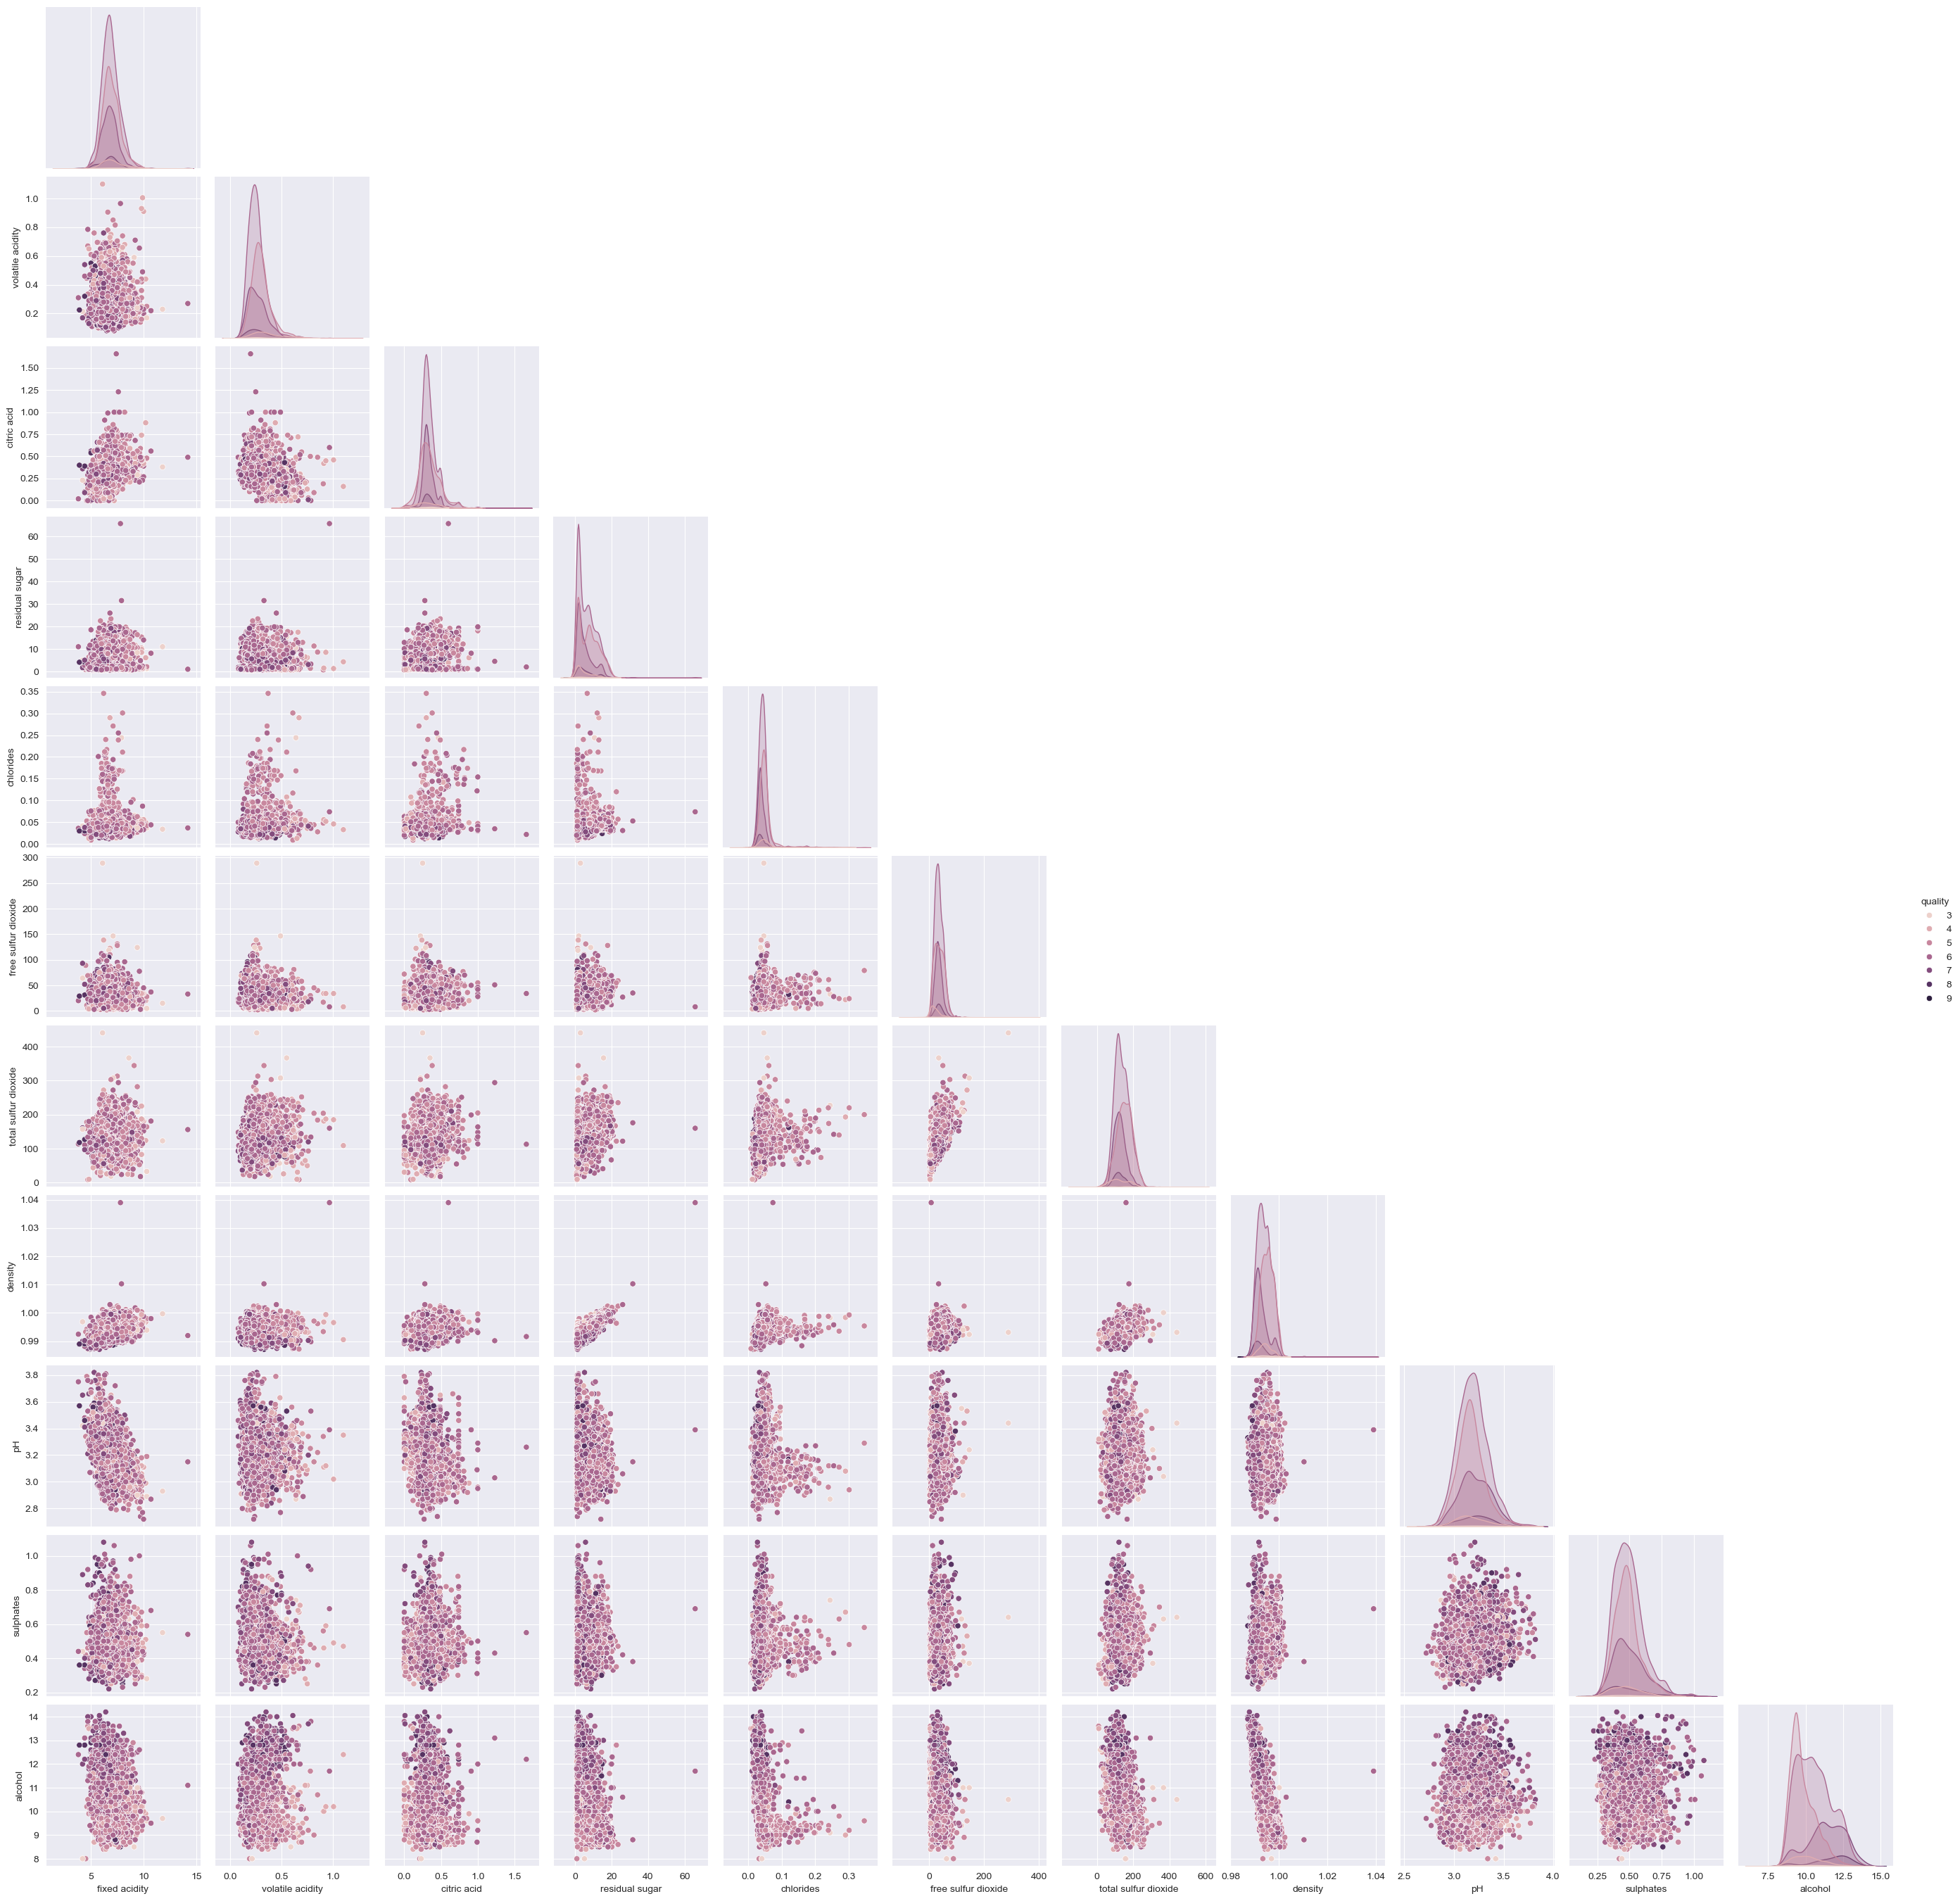

In [8]:
sns.pairplot(df_wqw, hue='quality', corner = True)

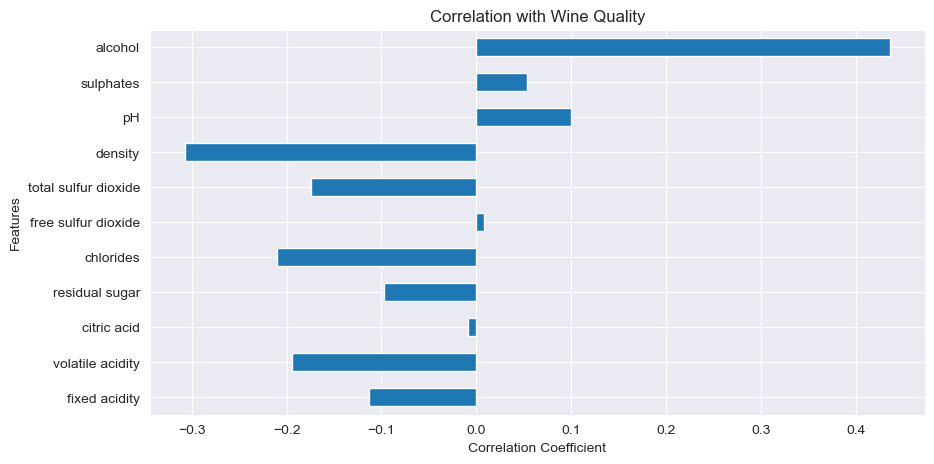

In [9]:
correlation = df_wqw.corr()["quality"].drop("quality")
correlation.plot(kind="barh", figsize=(10, 5), title="Correlation with Wine Quality")
plt.ylabel("Features")
plt.xlabel("Correlation Coefficient")
plt.show()

### Data Preprocessing

In [10]:
# Defining Data Features
x = df_wqw.loc[:,df_wqw.columns != "quality"]
y = df_wqw["quality"]

In [11]:
# Mutual information
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X,Y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index= X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y)


#### Data Distribution and Mutual Information Comparison

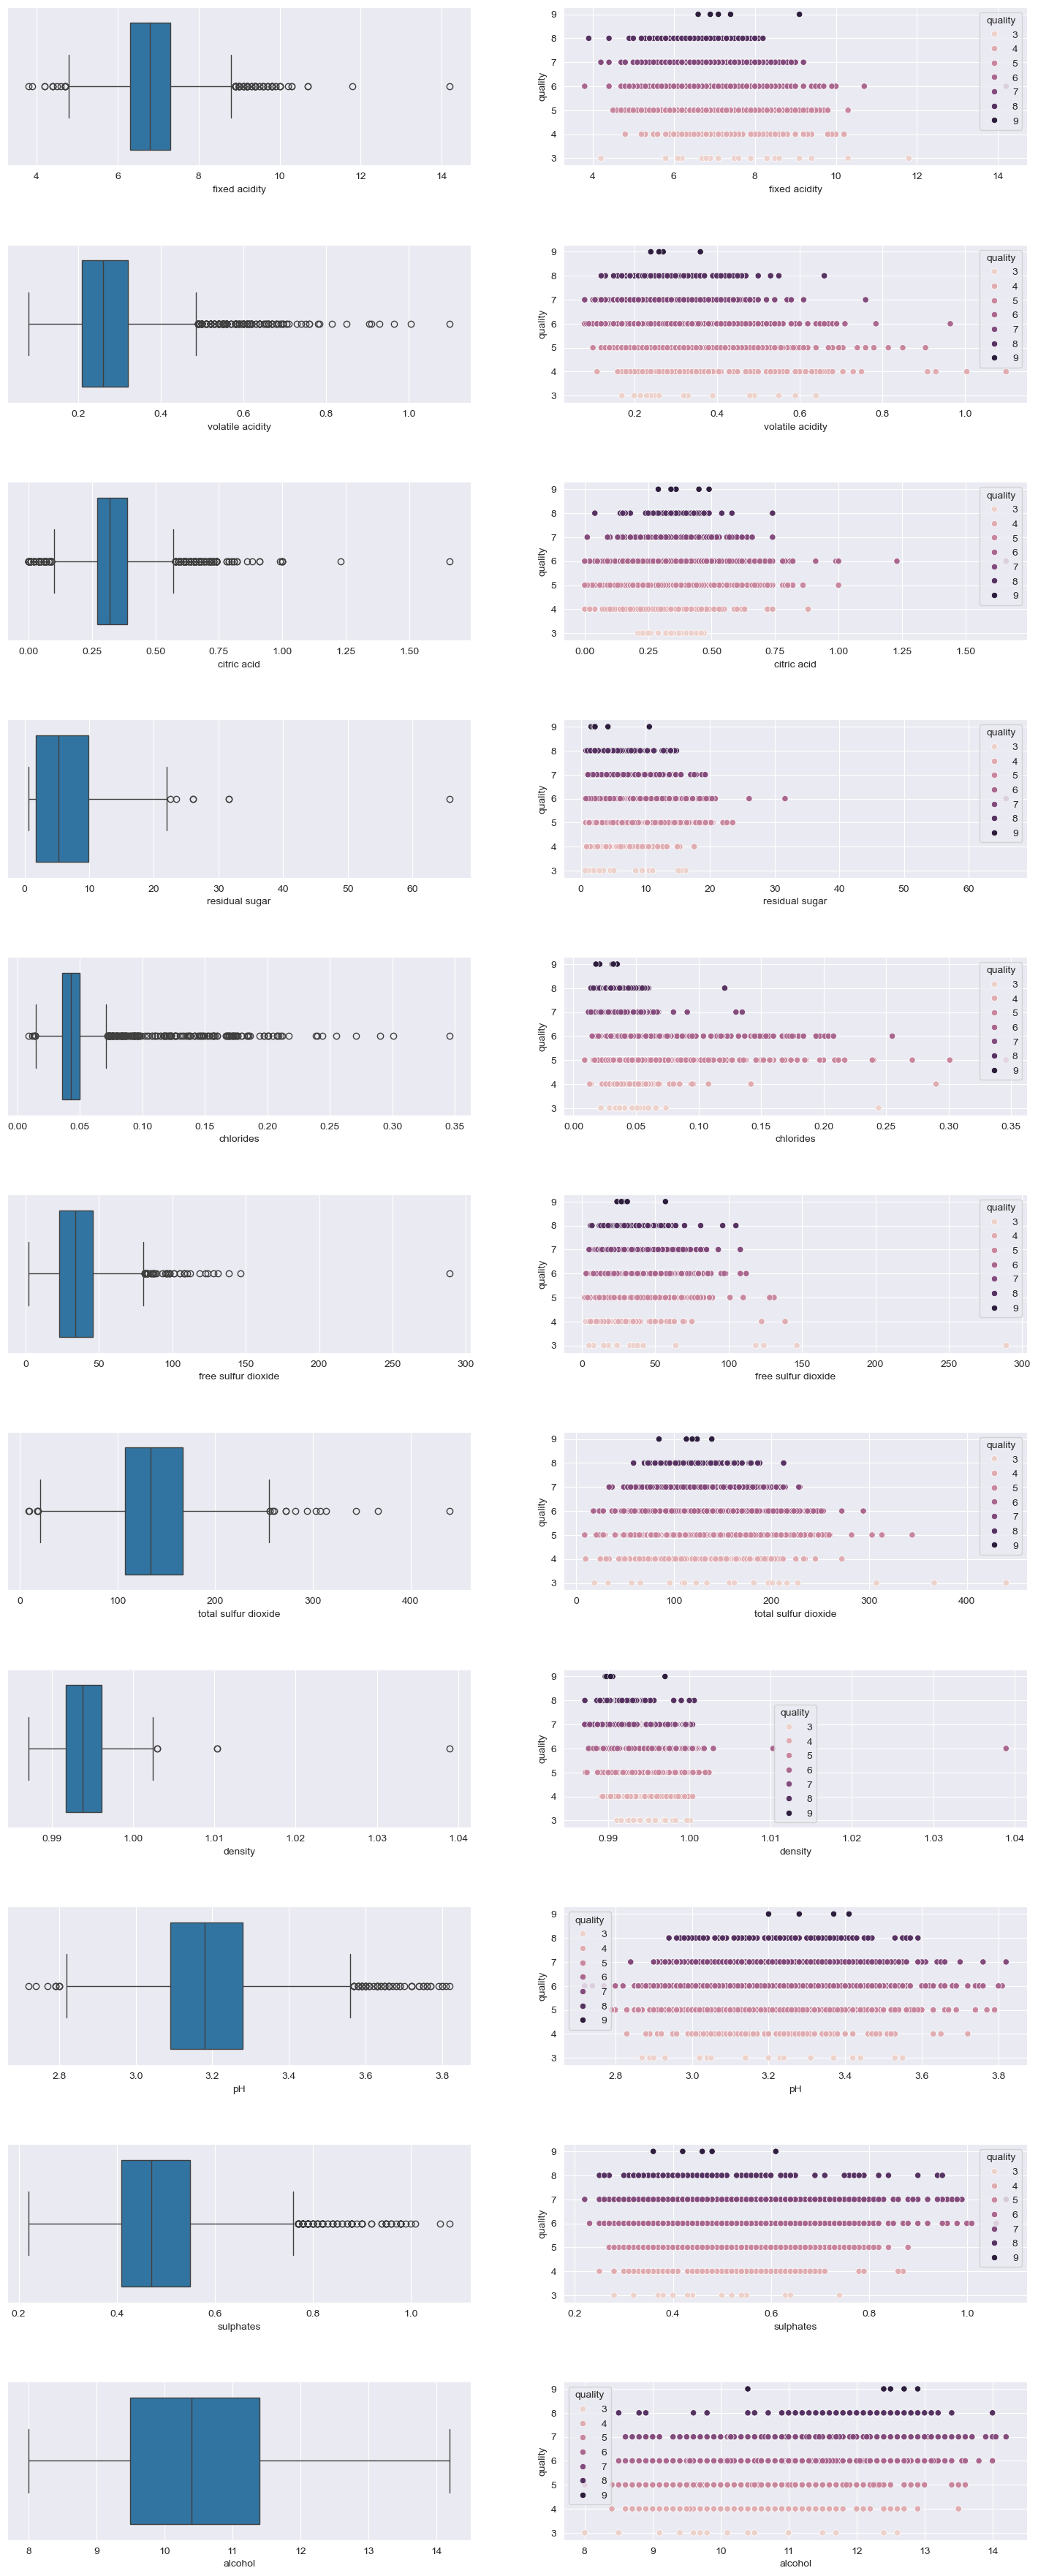

In [12]:
fig, ax = plt.subplots(11,2, figsize=(18,45))
plt.subplots_adjust(hspace=0.5)
for i in range (11):
    #1
    sns.boxplot(x=df_wqw.columns[i], data=df_wqw, ax=ax[i,0])
    #2
    sns.scatterplot(x=df_wqw.columns[i], y=df_wqw["quality"], data = df_wqw, hue="quality", ax=ax[i,1] )
plt.show()

In [13]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


#### Normalization

In [16]:
# Standard Scaler Normalization
X_ss = StandardScaler().fit_transform(x)

# MinMax Scaler Normalization
X_mm = MinMaxScaler(feature_range=(0,1)).fit_transform(x)

X_MM = pd.DataFrame(X_mm, columns = x.columns)

##### Defining Function for Preprocessing

In [15]:
#

#### Comparing Normalization differences

In [17]:
X_ss

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [18]:
X_MM

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194


In [19]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

#### Split Dataframe

In [20]:
# Applying the Regular Normalization StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.2, random_state = 42)

# Applying the MinMax Scaler()
X_train_sx, X_test_sx, y_train_sx, y_test_sx = train_test_split(X_MM, y, test_size = 0.2, random_state = 42)



#### Parameters

In [21]:
parameters = {
    'penalty': ['l1', 'l2'],
    'tol': [1e-1, 1e-2, 1e-3, 1e-4],
    'C' : uniform(0.001,1000),
    'fit_intercept': [True, False],
    'intercept_scaling': [1,True, False],
    'class_weight' : ['balanced',None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky', 'sag', 'saga']}

In [22]:
#L_R = LogisticRegression(max_iter=1000)
#cv = GridSearchCV(estimator=L_R, param_grid=parameters, cv=5).fit(X_train, y_train)

#print(f" Best Hyper Parameters: {cv.best_params_}")
#print(f"Accuracy: {cv.best_score_}")

In [45]:
#CV = GridSearchCV(estimator=L_R, param_grid=parameters, cv=5)
#cv_sx =CV.fit(X_train_sx,y_train_sx)

#print(f"Best Hyper Parameters: {cv_sx.best_params_}")
#print(f"Accuracy: {cv_sx.best_score_}")